# Personality and reproductive strategy

In this notebook we explore possible association of big-5 personality and sexual preferences, corresponding to evolutionary reproductive strategy, of a set of several hundred women and men.

We are using a [dataset](https://data.mendeley.com/datasets/wgr6fhz4zx/1) by Rogowska et al. of 768 Polish adults aged between 16 and 42, who completed a Polish version of shortened 20-question IPIP-BFM questionnaire.

I translated the questionnaire and calculated scores on all the 5 scales.

In [2]:
# here is the Polish mini-IPIP (20 questions) questionnaire (I assume it was used, cause the dataset is Polish)

# 1. I am the life and soul of the party. - 1. E
# 2. I don't really care about other people. - A (R)
# 3. I leave my things wherever they go. - C (R)
# 4. I am usually relaxed. - 9. N (R)
# 5. I have a rich vocabulary. - I
# 6. I stay aside. - E (R)
# 7. I understand others' feelings. - 2. A
# 8. I fulfill my daily duties without delay. - 3. C
# 9. I often worry about something. - N
# 10. I have difficulty understanding abstract concepts. - 15. I (R)
# 11. I talk to many different people at parties. - 11. E
# 12. I am not interested in other people's problems. - 7. A (R)
# 13. I often forget to put things back. - 8. C (R)
# 14. I rarely feel depressed. - 19. N (R)
# 15. I have a head full of ideas. - I
# 16. I am sloppy among strangers. - E (R)
# 17. Make time for others. - A
# 18. PostÍpujÍ on schedule. - C
# 19. I have mood swings a lot. - 4. N
# 20. I don't have a very rich imagination. - 20. I (R)

# English analogue of the same questionnaire (https://www.researchgate.net/publication/7014171_The_Mini-IPIP_Scales_Tiny-yet-Effective_Measures_of_the_Big_Five_Factors_of_Personality)

# 1. E Am the life of the party. 
# 2. A Sympathize with others’ feelings 
# 3. C Get chores done right away. 
# 4. N Have frequent mood swings. 
# 5. I Have a vivid imagination. 
# 6. E Don’t talk a lot. (R) 
# 7. A Am not interested in other people’s problems. (R) 
# 8. C Often forget to put things back in their proper place. (R) 
# 9. N Am relaxed most of the time. (R) 
# 10. I Am not interested in abstract ideas. (R) 
# 11. E Talk to a lot of different people at parties. 
# 12. A Feel others’ emotions. 
# 13. C Like order. 
# 14. N Get upset easily. 
# 15. I Have difficulty understanding abstract ideas. (R) 
# 16. E Keep in the background. (R) 
# 17. A Am not really interested in others. (R) 
# 18. C Make a mess of things. (R) 
# 19. N Seldom feel blue. (R) 
# 20. I Do not have a good imagination. (R)


In [17]:
import math

import torch
import numpy as np
import pandas as pd


pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


repo = pd.read_excel('./data/Data Repository.xlsx')

# calculate big-5 scales
repo['sEXT'] = (repo['IPIP_01'] + (6 - repo['IPIP_06']) + repo['IPIP_11'] + (6 - repo['IPIP_16'])) / 4
repo['sAGR'] = ((6 - repo['IPIP_02']) + repo['IPIP_07'] + (6 - repo['IPIP_12']) + repo['IPIP_17']) / 4
repo['sCON'] = ((6 - repo['IPIP_03']) + repo['IPIP_08'] + (6 - repo['IPIP_13']) + repo['IPIP_18']) / 4
repo['sNEU'] = ((6 - repo['IPIP_04']) + repo['IPIP_09'] + (6 - repo['IPIP_14']) + repo['IPIP_19']) / 4
repo['sOPN'] = (repo['IPIP_05'] + (6 - repo['IPIP_10']) + repo['IPIP_15'] + (6 - repo['IPIP_20'])) / 4

# two males reported infinite amount of sexual partners, their test results might not be accurate, drop them
repo = repo.drop([298, 367])

repo

Time of participation  IPIP_01  IPIP_02  IPIP_03  IPIP_04  IPIP_05  IPIP_06  IPIP_07  IPIP_08  IPIP_09  IPIP_10  IPIP_11  IPIP_12  IPIP_13  IPIP_14  IPIP_15  IPIP_16  IPIP_17  IPIP_18  IPIP_19  IPIP_20 SS_01 SS_02 SS_03 SS_04 SS_05 SS_06 SS_07 SS_08 SS_09 SS_10 SS_11 SS_12 SS_13    SEX   Age Sexual orientation Do you hide your sexual orientation?  How many were you previously had sexual partners? (enter the number below)  sEXT  sAGR  sCON  sNEU  sOPN
0   2017-12-27 22:10:37.772      2.0      2.0      4.0      3.0      4.0      4.0      4.0      2.0      5.0      2.0      2.0      1.0      4.0      2.0      5.0      5.0      4.0      3.0      4.0      1.0     B     B     B     A     A     B     B     B     A     A     A     A     B  Women  23.0       Heterosexual                                   No                                                1.0                           1.75  4.25  2.25  4.00  4.50
1   2017-12-27 22:22:17.237      3.0      4.0      5.0      4.0      4.0      3.0      4.0      4.0      2.0      1.0      2.0      3.0      5.0      4.0      3.0      5.0      4.0      3.0      1.0      1.0     B     B     B     A     B     A     B     B     A     A     B     A     B  Women  23.0       Heterosexual                                   No                                                1.0                           2.25  3.25  2.25  1.75  4.25
2   2017-12-27 22:22:39.788      5.0      3.0      5.0      2.0      4.0      1.0      3.0      3.0      5.0      3.0      5.0      1.0      3.0      1.0      5.0      1.0      5.0      3.0      5.0      1.0     A     B     A     A     A     B     A     A     A     B     A     A     A    Men  24.0       Heterosexual                                   No                                                1.0                           5.00  4.00  2.50  4.75  4.25
3   2017-12-27 22:25:04.003      5.0      1.0      4.0      3.0      5.0      1.0      5.0      3.0      4.0      1.0      5.0      1.0      3.0      4.0      5.0      2.0      4.0      4.0      3.0      1.0     A     B     B     A     A     B     A     A     A     A     A     A     A  Women  25.0       Heterosexual                                   No                                                8.0                           4.75  4.75  3.00  3.00  5.00
4   2017-12-27 22:28:45.261      2.0      2.0      2.0      2.0      2.0      3.0      5.0      3.0      4.0      2.0      2.0      2.0      2.0      3.0      3.0      3.0      3.0      3.0      3.0      2.0     B     B     B     A     B     B     B     A     A     A     B     A     B  Women  23.0       Heterosexual                                   No                                                1.0                           2.50  4.00  3.50  3.50  3.25
5   2017-12-27 22:29:18.201      2.0      3.0      1.0      3.0      2.0      4.0      5.0      2.0      3.0      4.0      1.0      2.0      2.0      4.0      2.0      5.0      4.0      4.0      2.0      4.0     B     B     B     A     B     A     B     B     A     A     B     B     A  Women  23.0       Heterosexual                                   No                                                1.0                           1.50  4.00  3.75  2.50  2.00
6   2017-12-27 22:31:03.592      3.0      3.0      2.0      2.0      5.0      3.0      3.0      4.0      1.0      2.0      2.0      2.0      1.0      5.0      5.0      3.0      5.0      4.0      4.0      1.0     A     B     A     A     A     B     A     A     A     B     A     A     A  Women  23.0       Heterosexual                                   No                                               10.0                           2.75  3.75  4.25  2.50  4.75
7   2017-12-27 22:41:52.600      3.0      4.0      5.0      3.0      4.0      3.0      5.0      1.0      4.0      2.0      2.0      4.0      5.0      2.0      3.0      4.0      5.0      3.0      4.0      2.0     B     B     B     A     A     A     B     A     A     A     A     A     B  Women  24.0       Heterosexual 

## Differences between mean personality scores of men and women

[Jordan Peterson claims](https://www.youtube.com/watch?v=LLyPVgeH-jo) that the largest observable difference between men and women. He claims that Agreebleness scores differ between genders by 0.5 standard deviation, lower for men. 

Indeed, this dataset confirm his claim. 

Note: I removed homo- and bi-sexual people from the sample, because this dataset contains an overabundance of non-heterosexual people, about 40%, compared to their proportion in the general population, so they introduce a greater bias than they do in general population.

In [5]:
repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women')].mean()

/var/folders/v5/07d7bzx52nx37_jlxbw4yq6h0000gn/T/ipykernel_63885/510904929.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women')].mean()
/var/folders/v5/07d7bzx52nx37_jlxbw4yq6h0000gn/T/ipykernel_63885/510904929.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women')].mean()


IPIP_01                                                                        3.146341
IPIP_02                                                                        2.362369
IPIP_03                                                                        2.891986
IPIP_04                                                                        2.578397
IPIP_05                                                                        3.668990
IPIP_06                                                                        2.839721
IPIP_07                                                                        4.010453
IPIP_08                                                                        2.811847
IPIP_09                                                                        4.094077
IPIP_10                                                                        2.254355
IPIP_11                                                                        3.202091
IPIP_12                         

In [7]:
repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Men')].mean()

/var/folders/v5/07d7bzx52nx37_jlxbw4yq6h0000gn/T/ipykernel_63885/1539434701.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Men')].mean()
/var/folders/v5/07d7bzx52nx37_jlxbw4yq6h0000gn/T/ipykernel_63885/1539434701.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Men')].mean()


IPIP_01                                                                        3.061538
IPIP_02                                                                        2.692308
IPIP_03                                                                        2.661538
IPIP_04                                                                        3.107692
IPIP_05                                                                        3.646154
IPIP_06                                                                        3.128205
IPIP_07                                                                        3.641026
IPIP_08                                                                        2.671795
IPIP_09                                                                        3.697436
IPIP_10                                                                        2.358974
IPIP_11                                                                        3.148718
IPIP_12                         

In [9]:
repo[(repo['Sexual orientation'] == 'Heterosexual')].std()

/var/folders/v5/07d7bzx52nx37_jlxbw4yq6h0000gn/T/ipykernel_63885/3487680796.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repo[(repo['Sexual orientation'] == 'Heterosexual')].std()


Time of participation                                                         3 days 16:28:53.411917362
IPIP_01                                                                                        1.071217
IPIP_02                                                                                        1.194662
IPIP_03                                                                                        1.303664
IPIP_04                                                                                        0.991914
IPIP_05                                                                                        0.914425
IPIP_06                                                                                        1.178537
IPIP_07                                                                                        1.013102
IPIP_08                                                                                        1.058686
IPIP_09                                                         

In [10]:
agreebleness_difference = 3.538 - 3.857
agreebleness_std = 0.745
agreebleness_difference/agreebleness_std

-0.42818791946308776

In [11]:
neuroticism_difference = 3.627178 - 3.142308
neuroticism_std = 0.863343
neuroticism_difference/neuroticism_std

0.5616191942252383

## Liberals vs Conservatives

Next I am trying to verify the hypothesis that big-5 psychotype pre-determines (to a degree) the reproducive strategy of women: the amount of sexual partners they have over the course of their lives.

I call women, who tend to have multitude of sexual partners, liberals, while those who report themselves as having strictly monogamous relationships (0-1 sexual partners or so by some age), conservatives in reproductive strategy sense.

I then inspect the differences between mean big-5 scales. I find that 'sexual liberals' tend to have higher Extraversy, Neuroticism and Openness on average, while 'sexual conservatives' tend to have higher Agreebleness and Conscientiousness. 

Interestingly, [Peterson claims](https://www.youtube.com/watch?v=QS9aIqUQ7oE) that same differences in traits are observed in liberals vs conservatives in terms of political alignment: 'political conservatives' are orderly (high sCON) and low on openness (low sOPN).

In [45]:
conservatives = repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women') & (repo['How many were you previously had sexual partners? (enter the number below)'] < 2) & (repo['Age'] > 21)]
liberals = repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women') & ((repo['How many were you previously had sexual partners? (enter the number below)'] > 1) & (repo['Age'] < 23) | ((repo['How many were you previously had sexual partners? (enter the number below)'] > 3) & (repo['Age'] < 27)) | (repo['How many were you previously had sexual partners? (enter the number below)'] > 5))]

In [46]:
print(len(conservatives))
conservatives.mean()

66


DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


IPIP_01                                                                        3.151515
IPIP_02                                                                        2.121212
IPIP_03                                                                        2.681818
IPIP_04                                                                        2.757576
IPIP_05                                                                        3.606061
IPIP_06                                                                        2.742424
IPIP_07                                                                        4.212121
IPIP_08                                                                        2.969697
IPIP_09                                                                        3.984848
IPIP_10                                                                        2.333333
IPIP_11                                                                        3.151515
IPIP_12                         

In [47]:
print(len(liberals))
liberals.mean()

81


DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


IPIP_01                                                                        3.222222
IPIP_02                                                                        2.617284
IPIP_03                                                                        2.851852
IPIP_04                                                                        2.518519
IPIP_05                                                                        3.839506
IPIP_06                                                                        2.851852
IPIP_07                                                                        3.925926
IPIP_08                                                                        2.790123
IPIP_09                                                                        4.160494
IPIP_10                                                                        2.259259
IPIP_11                                                                        3.395062
IPIP_12                         

## Modelling

Now I am trying to construct a model that is supposed to predict, whether a person is a conservative or a liberal.

In [48]:
liberals['liberal'] = 1
conservatives['liberal'] = 0
classes = pd.concat([liberals, conservatives])
classes


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time of participation  IPIP_01  IPIP_02  IPIP_03  IPIP_04  IPIP_05  IPIP_06  IPIP_07  IPIP_08  IPIP_09  IPIP_10  IPIP_11  IPIP_12  IPIP_13  IPIP_14  IPIP_15  IPIP_16  IPIP_17  IPIP_18  IPIP_19  IPIP_20 SS_01 SS_02 SS_03 SS_04 SS_05 SS_06 SS_07 SS_08 SS_09 SS_10 SS_11 SS_12 SS_13    SEX   Age Sexual orientation Do you hide your sexual orientation?  How many were you previously had sexual partners? (enter the number below)  sEXT  sAGR  sCON  sNEU  sOPN  liberal
3   2017-12-27 22:25:04.003      5.0      1.0      4.0      3.0      5.0      1.0      5.0      3.0      4.0      1.0      5.0      1.0      3.0      4.0      5.0      2.0      4.0      4.0      3.0      1.0     A     B     B     A     A     B     A     A     A     A     A     A     A  Women  25.0       Heterosexual                                   No                                                8.0                           4.75  4.75  3.00  3.00  5.00        1
6   2017-12-27 22:31:03.592      3.0      3.0      2.0      2.0      5.0      3.0      3.0      4.0      1.0      2.0      2.0      2.0      1.0      5.0      5.0      3.0      5.0      4.0      4.0      1.0     A     B     A     A     A     B     A     A     A     B     A     A     A  Women  23.0       Heterosexual                                   No                                               10.0                           2.75  3.75  4.25  2.50  4.75        1
12  2017-12-27 23:30:07.594      2.0      1.0      1.0      5.0      2.0      5.0      2.0      4.0      5.0      3.0      5.0      3.0      1.0      1.0      3.0      1.0      3.0      5.0      5.0      3.0     B     B     A     B     A     A     A     A     A     A     B     A     A  Women  23.0       Heterosexual                                   No                                                5.0                           3.25  3.25  4.75  4.00  2.75        1
18  2017-12-28 00:04:06.052      3.0      3.0      5.0      2.0      5.0      3.0      5.0      1.0      5.0      2.0      2.0      3.0      5.0      2.0      3.0      4.0      5.0      1.0      4.0      1.0     B     B     B     A     A     B     A     A     A     A     A     A     B  Women  22.0       Heterosexual                                   No                                                8.0                           2.50  4.00  1.00  4.25  4.25        1
19  2017-12-28 00:04:20.393      3.0      2.0      4.0      2.0      3.0      2.0      4.0      2.0      4.0      2.0      3.0      2.0      4.0      2.0      3.0      3.0      4.0      1.0      4.0      2.0     A     B     B     A     A     B     B     A     A     A     A     A     B  Women  23.0       Heterosexual                                   No                                                5.0                           3.25  4.00  1.75  4.00  3.50        1
23  2017-12-28 00:53:17.952      4.0      1.0      5.0      3.0      4.0      2.0      5.0      2.0      5.0      2.0      4.0      2.0      5.0      2.0      3.0      2.0      3.0      3.0      3.0      1.0     A     B     B     A     B     A     B     A     A     A     B     A     B  Women  21.0       Heterosexual                                   No                                                2.0                           4.00  4.25  1.75  3.75  4.00        1
29  2017-12-28 07:22:45.113      3.0      3.0      1.0      3.0      4.0      5.0      3.0      5.0      4.0      3.0      3.0      3.0      1.0      3.0      4.0      3.0      3.0      3.0      4.0      1.0     B     B     B     A     A     B     A     A     B     A     B     A     A  Women  20.0       Heterosexual                                   No                                                2.0                           2.50  3.00  4.50  3.50  4.00        1
31  2017-12-28 08:46:20.698      3.0      2.0      1.0      5.0      4.0      2.0      5.0      2.0      2.0      1.0      4.0      2.0      1.0      4.0      4.0      2.0      3.0      1.0      2.0      1.0     A     B     A     B     A     B   

147


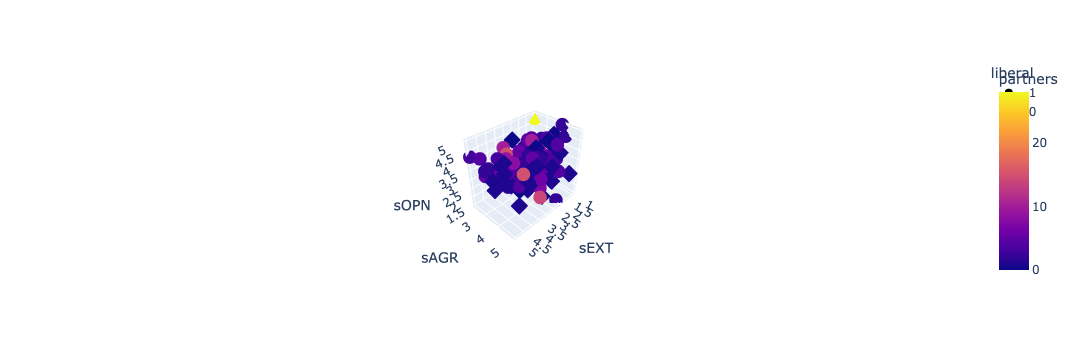

In [49]:
import plotly.express as px


# classifier = repo[(repo['Sexual orientation'] == 'Heterosexual') & (repo['SEX'] == 'Women')]
# classifier = classifier.rename(columns={"How many were you previously had sexual partners? (enter the number below)": "partners"})
# classifier['feminist'] = classifier['partners'].apply(lambda x: 0 if x < 2 else 1)

print(len(classes))
classes = classes.rename(columns={"How many were you previously had sexual partners? (enter the number below)": "partners"})

df = px.data.iris()
fig = px.scatter_3d(
    classes, 
    x='sEXT', 
    y='sAGR', 
    z='sOPN',
    color='partners', 
    symbol='liberal'
)
fig.show()

## Modelling

Here I try to train a gradient boosting binary classifier model that is allowed to look at both big-5 scales and raw questionnaire answers.

First I try to train it on one train/test split, then run a proper cross-validation.

Then I use both XGBoost built-in method and SHAP to explain the importance of predictors.

In [54]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_classes = classes[['sEXT', 'sAGR', 'sCON', 'sNEU', 'sOPN', 'IPIP_01', 'IPIP_02', 'IPIP_03', 'IPIP_04', 'IPIP_05', 'IPIP_06', 'IPIP_07', 'IPIP_08', 'IPIP_09', 'IPIP_10', 'IPIP_11', 'IPIP_12', 'IPIP_13', 'IPIP_14', 'IPIP_15', 'IPIP_16', 'IPIP_17', 'IPIP_18', 'IPIP_19', 'IPIP_20']]
y_classes = classes[['liberal']]
X_classes_train, X_classes_test, y_classes_train, y_classes_test = train_test_split(X_classes, y_classes, test_size=0.33)


xgb = XGBClassifier(tree_method='hist')
xgb.fit(X_classes_train, y_classes_train)

predictions = xgb.predict(X_classes_test)
result = X_classes_test.copy()
result['predictions'] = predictions
result['liberal'] = y_classes_test

print(classification_report(y_classes_test, predictions))

result

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        25
           1       0.58      0.62      0.60        24

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.59      0.59      0.59        49



sEXT  sAGR  sCON  sNEU  sOPN  IPIP_01  IPIP_02  IPIP_03  IPIP_04  IPIP_05  IPIP_06  IPIP_07  IPIP_08  IPIP_09  IPIP_10  IPIP_11  IPIP_12  IPIP_13  IPIP_14  IPIP_15  IPIP_16  IPIP_17  IPIP_18  IPIP_19  IPIP_20  predictions  liberal
709  1.25  3.75  2.00  4.50  4.50      2.0      4.0      4.0      2.0      5.0      5.0      5.0      1.0      5.0      2.0      1.0      3.0      4.0      2.0      4.0      5.0      5.0      3.0      5.0      1.0            1        0
685  2.00  4.00  2.25  4.00  3.75      2.0      4.0      3.0      3.0      4.0      4.0      5.0      2.0      5.0      3.0      2.0      2.0      3.0      2.0      4.0      4.0      5.0      1.0      4.0      2.0            1        1
139  3.25  4.75  4.50  3.00  3.00      4.0      1.0      1.0      3.0      4.0      4.0      4.0      4.0      3.0      3.0      2.0      1.0      1.0      3.0      3.0      1.0      5.0      4.0      3.0      4.0            0        1
613  4.00  3.50  3.75  3.25  4.00      4.0      3.0      2.0      3.0      5.0      2.0      4.0      3.0      4.0      2.0      4.0      3.0      2.0      3.0      4.0      2.0      4.0      4.0      3.0      3.0            1        1
350  1.50  2.50  1.25  2.25  3.75      3.0      4.0      5.0      5.0      5.0      5.0      2.0      2.0      3.0      3.0      1.0      4.0      5.0      3.0      2.0      5.0      4.0      1.0      2.0      1.0            0        1
496  3.25  3.50  3.00  4.50  3.00      3.0      2.0      4.0      1.0      3.0      3.0      4.0      4.0      5.0      3.0      4.0      4.0      4.0      3.0      3.0      3.0      4.0      4.0      5.0      3.0            1        1
729  4.25  4.25  3.75  4.25  4.25      5.0      1.0      2.0      1.0      4.0      2.0      5.0      3.0      5.0      3.0      5.0      2.0      1.0      2.0      5.0      3.0      3.0      3.0      3.0      1.0            0        1
327  1.50  3.25  3.50  3.75  3.00      2.0      3.0      1.0      4.0      3.0      5.0      4.0      3.0      5.0      3.0      2.0      3.0      3.0      2.0      3.0      5.0      3.0      3.0      4.0      3.0            1        1
58   3.00  4.00  2.25  2.50  4.00      3.0      2.0      2.0      3.0      5.0      3.0      5.0      1.0      2.0      2.0      3.0      2.0      4.0      4.0      3.0      3.0      3.0      2.0      3.0      2.0            1        0
348  2.00  3.00  4.00  3.00  3.50      2.0      4.0      2.0      2.0      3.0      3.0      4.0      3.0      1.0      3.0      2.0      3.0      1.0      2.0      3.0      5.0      3.0      4.0      3.0      1.0            0        0
0    1.75  4.25  2.25  4.00  4.50      2.0      2.0      4.0      3.0      4.0      4.0      4.0      2.0      5.0      2.0      2.0      1.0      4.0      2.0      5.0      5.0      4.0      3.0      4.0      1.0            1        0
716  3.50  4.00  2.00  2.50  3.50      3.0      2.0      4.0      3.0      3.0      3.0      4.0      2.0      3.0      2.0      3.0      2.0      5.0      4.0      4.0      1.0      4.0      3.0      2.0      3.0            0        1
62   2.50  4.75  4.75  3.50  3.75      3.0      1.0      1.0      2.0      4.0      4.0      5.0      5.0      4.0      2.0      3.0      1.0      1.0      3.0      3.0      4.0      4.0      4.0      3.0      2.0            0        0
458  2.25  3.75  3.00  4.25  3.75      2.0      2.0      4.0      2.0      3.0      4.0      4.0      4.0      5.0      1.0      3.0      2.0      4.0      2.0      3.0      4.0      3.0      4.0      4.0      2.0            1        1
17   2.75  4.25  3.50  2.25  3.00      2.0      1.0      2.0      4.0      3.0      3.0      4.0      3.0      3.0      3.0      3.0      2.0      2.0      4.0      3.0      3.0      4.0      3.0      2.0      3.0            0        0
309  3.50  4.25  4.00  2.25  3.50      4.0      3.0      2.0      4.0      4.0      2.0      5.0      3.0      2.0      3.0      2.0      2.0      1.0      2.0      3.0      2.0      5.0      4.0      1.0      2.0            0   

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

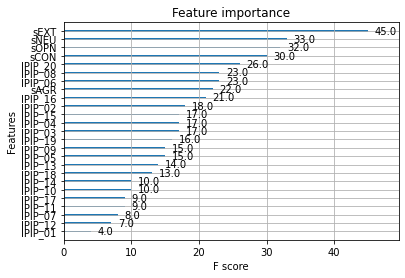

In [51]:
plot_importance(xgb)

In [52]:
import shap


# see: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
# see: https://stackoverflow.com/questions/73329209/difference-between-shap-treeexplainer-and-shap-explainer-bar-charts

# print the JS visualization code to the notebook
shap.initjs()

background = shap.maskers.Independent(X_classes_train, 10) # data to train both explainers on

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_classes_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_classes_test.iloc[2,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## K-fold cross-validation

In [56]:
from sklearn.model_selection import KFold
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report


kfold = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kfold.split(X_classes):
    X_train, X_test = X_classes.iloc[train_index], X_classes.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]
    
    xgb = XGBClassifier(tree_method='hist')
    xgb.fit(X_train, y_train)

    predictions = xgb.predict(X_test)
    result = X_test.copy()
    result['predictions'] = predictions
    result['liberal'] = y_test

    print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        15
           1       0.55      0.73      0.63        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.57      0.57      0.55        30

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.59      0.71      0.65        14

    accuracy                           0.63        30
   macro avg       0.64      0.64      0.63        30
weighted avg       0.64      0.63      0.63        30

              precision    recall  f1-score   support

           0       0.40      0.29      0.33        14
           1       0.47      0.60      0.53        15

    accuracy                           0.45        29
   macro avg       0.44      0.44      0.43        29
weighted avg       0.44      0.45      0.43        29

              preci

# AutoML libraries for modelling

Results that the raw gradient boosting models attain suggest that there is a correlation, but generally they are not very impressive. Here I try 2 automl libraries, Sber LightAutoML (LAMA) and H2O.

## Sber LigthAutoML (LAMA)

In [70]:
# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco


N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300
TARGET_NAME = 'liberal'

classes_train, classes_test = train_test_split(classes, test_size=0.33)

task = Task('binary')
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)
roles = {
    'target': TARGET_NAME,
    'drop': []
}

In [71]:
%%time
oof_pred = automl.fit_predict(classes_train, roles=roles)

Start automl preset with listed constraints:
- time: 300 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (98, 45)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 299.6611120700836 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.9292929292929293
Linear model: C = 5e-05 score = 0.9292929292929293
Linear model: C = 0.0001 score = 0.9292929292929293

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.9292929292929293
Linear model: C = 5e-05 score = 0.9090909090909091
Linear model: C = 0.0001 score = 0.9090909090909091

===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.8181818181818182
Linear model: C = 5e-05 score = 0.8181818181818182
Linear model: C = 0.0001 score = 0.8181818181818182

===== Start working with fold 

In [72]:
%%time

te_pred = automl.predict(classes_test)
print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

Prediction for te_data:
array([[0.5078696 ],
       [0.5508156 ],
       [0.5519398 ],
       [0.5511504 ],
       [0.5083555 ],
       [0.50783193],
       [0.5079011 ],
       [0.507928  ],
       [0.5083492 ],
       [0.50777394],
       [0.5477098 ],
       [0.5509492 ],
       [0.5508041 ],
       [0.55086845],
       [0.5483194 ],
       [0.50829   ],
       [0.5085819 ],
       [0.5511512 ],
       [0.5507705 ],
       [0.508031  ],
       [0.548678  ],
       [0.5079149 ],
       [0.5506612 ],
       [0.5461216 ],
       [0.50844926],
       [0.55153126],
       [0.5078249 ],
       [0.5511589 ],
       [0.5507715 ],
       [0.507978  ],
       [0.5079008 ],
       [0.5509134 ],
       [0.55135006],
       [0.5078101 ],
       [0.5519647 ],
       [0.5511715 ],
       [0.50805616],
       [0.5083518 ],
       [0.5515437 ],
       [0.5077737 ],
       [0.5083926 ],
       [0.50884444],
       [0.54601926],
       [0.5508373 ],
       [0.5458449 ],
       [0.50858057],
       [0.

## H20

In [93]:
from sklearn import datasets
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from h2o.sklearn import H2OAutoMLClassifier


# Based on:
# https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/sklearn-integration/H2OAutoML_as_sklearn_estimator.ipynb


seed = 2022
X_classes_train, X_classes_test, y_classes_train, y_classes_test = train_test_split(X_classes, y_classes, test_size=0.33)

pipeline = Pipeline([
    # ('polyfeat', PolynomialFeatures(degree=2)),
    # ('featselect', SelectKBest(f_classif, k=5)),
    ('classifier', H2OAutoMLClassifier(max_models=10, seed=seed, sort_metric='logloss'))
])

In [94]:
pipeline.fit(X_classes_train, y_classes_train)
preds = pipeline.predict(X_classes_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:37:15.798: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 98.0.

███████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [95]:
result = X_classes_test.copy()
result['preds'] = preds
result['liberal'] = y_classes_test

print(classification_report(y_classes_test, preds))

result

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.55      1.00      0.71        27

    accuracy                           0.55        49
   macro avg       0.28      0.50      0.36        49
weighted avg       0.30      0.55      0.39        49



sEXT  sAGR  sCON  sNEU  sOPN  IPIP_01  IPIP_02  IPIP_03  IPIP_04  IPIP_05  IPIP_06  IPIP_07  IPIP_08  IPIP_09  IPIP_10  IPIP_11  IPIP_12  IPIP_13  IPIP_14  IPIP_15  IPIP_16  IPIP_17  IPIP_18  IPIP_19  IPIP_20  preds  liberal
25   3.75  5.00  4.50  3.00  4.50      4.0      1.0      1.0      3.0      4.0      2.0      5.0      4.0      4.0      1.0      4.0      1.0      1.0      2.0      4.0      3.0      5.0      4.0      1.0      1.0      1        0
29   2.50  3.00  4.50  3.50  4.00      3.0      3.0      1.0      3.0      4.0      5.0      3.0      5.0      4.0      3.0      3.0      3.0      1.0      3.0      4.0      3.0      3.0      3.0      4.0      1.0      1        1
688  5.00  3.25  1.00  4.50  4.00      5.0      5.0      5.0      2.0      3.0      1.0      2.0      1.0      5.0      3.0      5.0      1.0      5.0      2.0      5.0      1.0      5.0      1.0      5.0      1.0      1        1
591  2.25  3.75  2.00  4.50  2.00      3.0      4.0      2.0      1.0      2.0      4.0      4.0      1.0      5.0      4.0      3.0      1.0      4.0      1.0      2.0      5.0      4.0      1.0      3.0      4.0      1        1
476  3.75  3.75  3.75  3.25  3.75      4.0      3.0      5.0      2.0      3.0      1.0      5.0      4.0      4.0      2.0      4.0      3.0      1.0      3.0      4.0      4.0      4.0      5.0      2.0      2.0      1        0
397  2.75  4.00  2.00  3.50  4.50      3.0      2.0      4.0      3.0      4.0      3.0      4.0      2.0      5.0      1.0      2.0      2.0      4.0      4.0      4.0      3.0      4.0      2.0      4.0      1.0      1        0
502  2.00  3.75  4.00  3.75  3.50      3.0      1.0      1.0      2.0      3.0      4.0      3.0      4.0      5.0      2.0      2.0      2.0      2.0      2.0      3.0      5.0      3.0      3.0      2.0      2.0      1        0
473  2.25  2.50  2.75  4.25  2.50      2.0      4.0      3.0      2.0      3.0      4.0      3.0      2.0      5.0      3.0      3.0      4.0      2.0      2.0      2.0      4.0      3.0      2.0      4.0      4.0      1        1
512  2.50  4.50  3.75  2.50  3.50      4.0      2.0      2.0      3.0      4.0      3.0      4.0      2.0      4.0      3.0      2.0      1.0      1.0      4.0      3.0      5.0      5.0      4.0      1.0      2.0      1        0
82   2.50  3.00  2.25  4.00  3.25      4.0      3.0      4.0      2.0      4.0      3.0      3.0      2.0      4.0      3.0      2.0      4.0      4.0      2.0      3.0      5.0      4.0      3.0      4.0      3.0      1        1
528  2.75  3.25  3.75  4.00  3.25      2.0      3.0      1.0      2.0      4.0      3.0      4.0      3.0      4.0      2.0      2.0      4.0      2.0      2.0      2.0      2.0      4.0      3.0      4.0      3.0      1        0
749  3.75  4.25  2.75  3.25  3.25      4.0      1.0      3.0      3.0      4.0      3.0      4.0      2.0      4.0      3.0      4.0      2.0      3.0      3.0      3.0      2.0      4.0      3.0      3.0      3.0      1        1
513  1.00  3.50  3.00  3.50  3.75      1.0      3.0      3.0      2.0      3.0      5.0      5.0      2.0      4.0      3.0      1.0      3.0      2.0      2.0      4.0      5.0      3.0      3.0      2.0      1.0      1        0
5    1.50  4.00  3.75  2.50  2.00      2.0      3.0      1.0      3.0      2.0      4.0      5.0      2.0      3.0      4.0      1.0      2.0      2.0      4.0      2.0      5.0      4.0      4.0      2.0      4.0      1        0
712  3.00  4.25  1.75  4.25  3.25      3.0      2.0      4.0      2.0      2.0      3.0      5.0      2.0      5.0      2.0      4.0      2.0      5.0      2.0      4.0      4.0      4.0      2.0      4.0      3.0      1        1
681  3.50  4.25  3.25  4.00  2.75      3.0      1.0      1.0      3.0      4.0      3.0      4.0      3.0      5.0      3.0      4.0      1.0      2.0      2.0      2.0      2.0      3.0      1.0      4.0      4.0      1        0
307  1.00  2.25  1.25  4.50  4.75      1.0      4.0      5.0      2.0      4.0      5.0      2.

In [115]:
import h2o
from h2o.automl import H2OAutoML


h2o.init()

X_classes = classes[['sEXT', 'sAGR', 'sCON', 'sNEU', 'sOPN', 'IPIP_01', 'IPIP_02', 'IPIP_03', 'IPIP_04', 'IPIP_05', 'IPIP_06', 'IPIP_07', 'IPIP_08', 'IPIP_09', 'IPIP_10', 'IPIP_11', 'IPIP_12', 'IPIP_13', 'IPIP_14', 'IPIP_15', 'IPIP_16', 'IPIP_17', 'IPIP_18', 'IPIP_19', 'IPIP_20']]
y_classes = classes[['liberal']]
pandas_classes = X_classes.copy()
pandas_classes['liberal'] = y_classes

h2o_classes = h2o.H2OFrame(pandas_classes)
h2o_classes["liberal"]= h2o_classes["liberal"].asfactor()

# Split into train & test
h2o_classes_train, h2o_classes_test = h2o_classes.split_frame(ratios = [0.33], seed = 1)

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y="liberal", training_frame=h2o_classes_train)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         8 hours 35 mins
H2O_cluster_timezone:       Europe/Moscow
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.1
H2O_cluster_version_age:    10 days
H2O_cluster_name:           H2O_from_python_burkov_d4jiss
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.669 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.5 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
16:49:27.515: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 59.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_10_20220929_164926_model_1


Status of Neuron Layers: predicting liberal, 2-class classification, bernoulli distribution, CrossEntropy loss, 2,802 weights/biases, 39.5 KB, 205,910 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  ----------------------  --------------------
    1        25       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.003992071845266037   0.008566278964281082   0.0         -0.0037535839322328686  0.19944757223129272  0.31231314494557444     0.13132178783416748
    3        2        Softmax                      0.0   0.0   0.0011446503918705274  0.0010939612984657288  0.0         -0.0188636087346822     0.6007559299468994   -0.0032963797735610176  0.019114159047603607

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 2.7972550544004095e-08
RMSE: 0.00016724996425710858
LogLoss: 6.0590128572043746e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9990550345679288
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      28   0    0        (0.0/28.0)
1      0    31   0        (0.0/31.0)
Total  28   31   0        (0.0/59.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.999055     1        24
max f2                       0.999055     1        24
max f0point5                 0.999055     1        24
max accuracy                 0.999055     1        24
max precision                1            1        0
max recall                   0.999055     1        24
max specificity              1            1        0
max absolute_mcc             0.999055     1        24
max min_per_class_accuracy   0.999055     1        24
max mean_per_class_accuracy  0.999055     1        24
max tns                      1            28       0
max fns                      1            26       0
max fps                      2.10106e-09  28       52
max tps                      0.999055     31       24
max tnr                      1            1        0
max fnr                      1            0.83871  0
max fpr                      2.10106e-09  1        52
max tpr                      0.999055     1        24

Gains/Lift Table: Avg response rate: 52.54 %, avg score: 52.54 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0169492                   1                  1.90323   1.90323            1                1            1                           1                   0.0322581       0.0322581                  90.3226   90.3226            0.0322581
2        0.0338983                   1                  1.90323   1.90323            1                1            1                           1                   0.0322581       0.0645161                  90.3226   90.3226            0.0645161
3        0.0338983                   1                  0         1.90323            0                0            1            

In [122]:
preds = aml.predict(h2o_classes_test)
pd.concat([h2o_classes_test.as_data_frame(), preds.as_data_frame()], axis=1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


sEXT  sAGR  sCON  sNEU  sOPN  IPIP_01  IPIP_02  IPIP_03  IPIP_04  IPIP_05  IPIP_06  IPIP_07  IPIP_08  IPIP_09  IPIP_10  IPIP_11  IPIP_12  IPIP_13  IPIP_14  IPIP_15  IPIP_16  IPIP_17  IPIP_18  IPIP_19  IPIP_20  liberal  predict            p0            p1
0   4.75  4.75  3.00  3.00  5.00        5        1        4        3        5        1        5        3        4        1        5        1        3        4        5        2        4        4        3        1        1        0  1.000000e+00  2.074511e-08
1   2.75  3.75  4.25  2.50  4.75        3        3        2        2        5        3        3        4        1        2        2        2        1        5        5        3        5        4        4        1        1        0  6.458817e-03  9.935412e-01
2   3.25  3.25  4.75  4.00  2.75        2        1        1        5        2        5        2        4        5        3        5        3        1        1        3        1        3        5        5        3        1        1  5.963180e-04  9.994037e-01
3   2.50  4.00  1.00  4.25  4.25        3        3        5        2        5        3        5        1        5        2        2        3        5        2        3        4        5        1        4        1        1        0  9.838520e-01  1.614801e-02
4   3.25  4.00  1.75  4.00  3.50        3        2        4        2        3        2        4        2        4        2        3        2        4        2        3        3        4        1        4        2        1        1  1.840324e-05  9.999816e-01
5   4.00  4.25  1.75  3.75  4.00        4        1        5        3        4        2        5        2        5        2        4        2        5        2        3        2        3        3        3        1        1        0  9.999571e-01  4.291520e-05
6   2.50  3.00  4.50  3.50  4.00        3        3        1        3        4        5        3        5        4        3        3        3        1        3        4        3        3        3        4        1        1        1  6.188957e-06  9.999938e-01
7   3.25  3.75  2.00  4.75  4.00        3        4        3        2        5        3        4        2        5        3        4        1        4        1        3        3        4        1        5        1        1        0  2.003189e-03  9.979968e-01
8   3.75  4.00  2.75  3.75  4.75        3        4        4        2        5        2        5        3        4        1        5        1        2        3        4        3        4        2        4        1        1        0  3.045173e-03  9.969548e-01
9   3.25  3.50  2.25  4.50  4.25        3        2        4        1        4        3        2        2        4        2        3        2        3        1        4        2        4        2        4        1        1        1  9.860822e-07  9.999990e-01
10  2.75  4.25  4.75  4.00  3.75        3        2        1        3        4        4        4        5        5        2        4        1        1        1        3        4        4        4        3        2        1        0  8.662456e-03  9.913375e-01
11  3.00  4.25  2.75  3.50  4.25        3        2        2        3        4        3        4        3        4        2        3        1        3        2        4        3        4        1        3        1        1        0  2.106562e-01  7.893438e-01
12  2.00  3.50  1.50  3.75  2.25        2        4        5        3        3        4        4        2        5        4        2        2        5        3        2        4        4        2        4        4        1        1  1.309396e-06  9.999987e-01
13  3.25  4.75  4.50  3.00  3.00        4        1        1        3        4        4        4        4        3        3        2        1        1        3        3        1        5        4        3        4        1        0  9.999982e-01  1.763803e-06
14  2.50  3.25  3.00  3.25  4.50        4        5        3        3        4        3        5        3        4      

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_9_20220929_164344_model_24         0.481324  0.231673  0.440298  0.332711                  0.231673                 162                   0.00387   XGBoost
DeepLearning_grid_1_AutoML_9_20220929_164344_model_6     0.487262  0.237424  0.449767  0.335993                  0.237424                  13                   0.005571  DeepLearning
StackedEnsemble_BestOfFamily_4_AutoML_9_20220929_164344  0.490947  0.241029  0.476342  0.342868                  0.241029                 120                   0.029115  StackedEnsemble
GBM_grid_1_AutoML_9_20220929_164344_model_3              0.492121  0.242183  0.480436  0.341962                  0.242183                  61                   0.010999  GBM
GLM_1_AutoML_9_20220929_164344                           0.492522  0.242578  0.488107  0.341805                  0.242578                  10                   0.047259  GLM
StackedEnsemble_BestOfFamily_1_AutoML_9_20220929_164344  0.492904  0.242954  0.489536  0.341795                  0.242954                 116                   0.022492  StackedEnsemble
XGBoost_grid_1_AutoML_9_20220929_164344_model_28         0.493101  0.243149  0.488263  0.340348                  0.243149                  27                   0.018052  XGBoost
GBM_2_AutoML_9_20220929_164344                           0.493489  0.243531  0.469364  0.341777                  0.243531                  51                   0.003812  GBM
XGBoost_grid_1_AutoML_9_20220929_164344_model_20         0.494488  0.244518  0.483473  0.342091                  0.244518                  41                   0.004715  XGBoost
GBM_grid_1_AutoML_9_20220929_164344_model_9              0.495071  0.245095  0.474956  0.343115                  0.245095                  28                   0.003814  GBM
GBM_grid_1_AutoML_9_20220929_164344_model_10             0.495508  0.245528  0.476086  0.342587                  0.245528                  91                   0.037535  GBM
XRT_1_AutoML_9_20220929_164344                           0.495809  0.245827  0.475902  0.344475                  0.245827                 101                   0.006792  DRF
XGBoost_grid_1_AutoML_9_20220929_164344_model_23         0.4971    0.247108  0.43488   0.344079                  0.247108                  31                   0.003546  XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_9_20220929_164344  0.497433  0.24744   0.493411  0.344569                  0.24744                  109                   0.045336  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_9_20220929_164344     0.497433  0.24744   0.493411  0.344569                  0.24744                  111                   0.054973  StackedEnsemble
GBM_grid_1_AutoML_9_20220929_164344_model_18             0.497711  0.247716  0.45448   0.348564                  0.247716                 124                   0.012925  GBM
XGBoost_grid_1_AutoML_9_20220929_164344_model_30         0.497764  0.247769  0.47937   0.345783                  0.247769                  21                   0.003098  XGBoost
GBM_grid_1_AutoML_9_20220929_164344_model_1              0.497835  0.24784   0.480335  0.346089                  0.24784                  102                   0.003338  GBM
GBM_grid_1_AutoML_9_20220929_164344_model_15             0.498173  0.248177  0.468128  0.345234                  0.248177                  33                   0.005208  GBM
GBM_grid_1_AutoML_9_20220929_164344_model_22             0.498213  0.248216  0.482488  0.344801                  0.248216                  21                   0.00366   GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

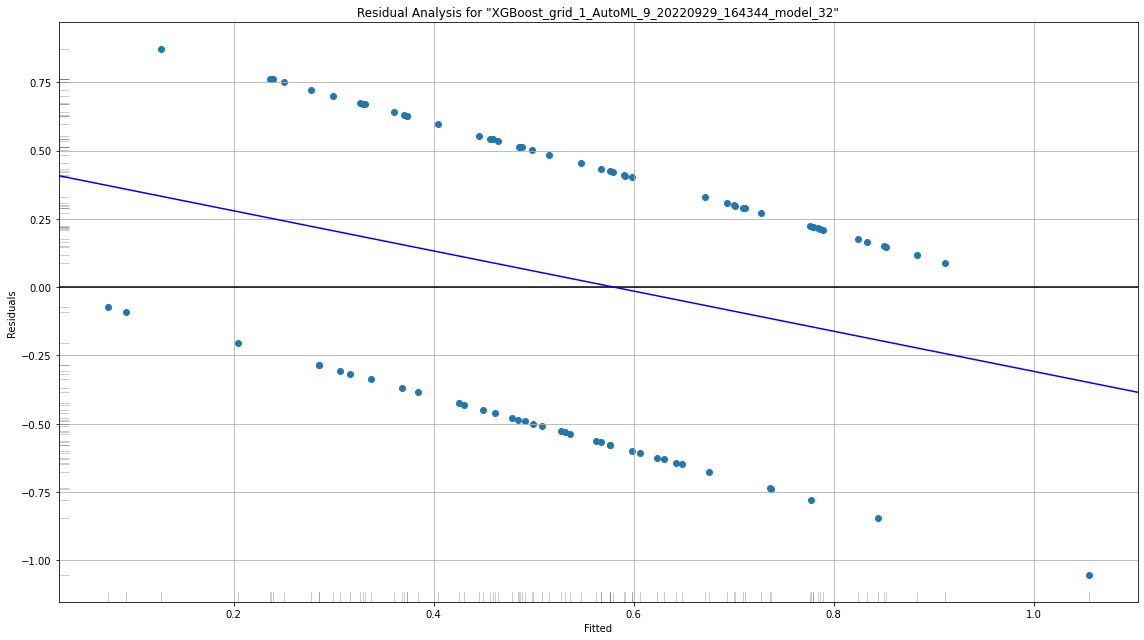

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

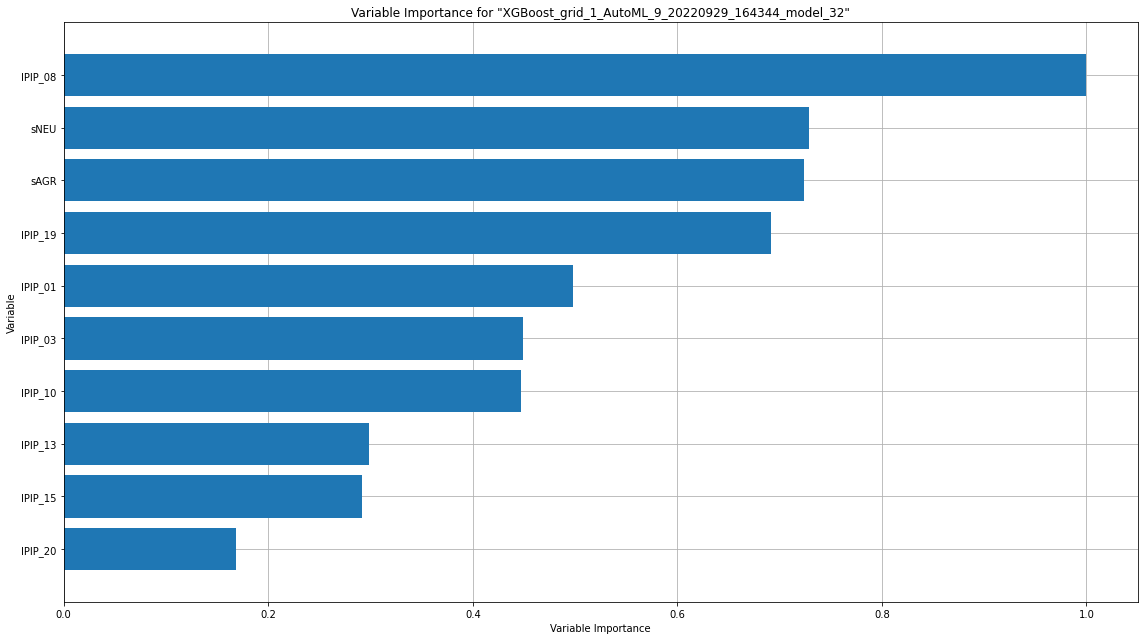

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

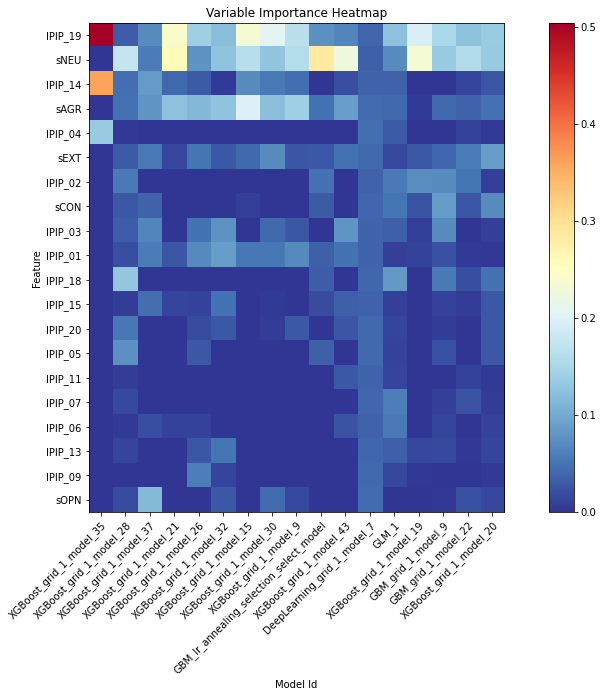

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

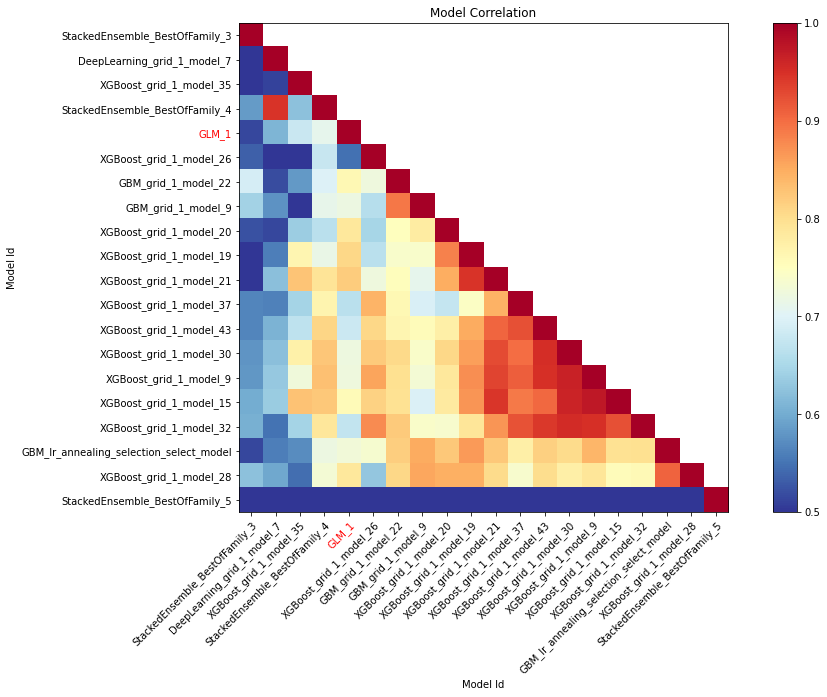

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

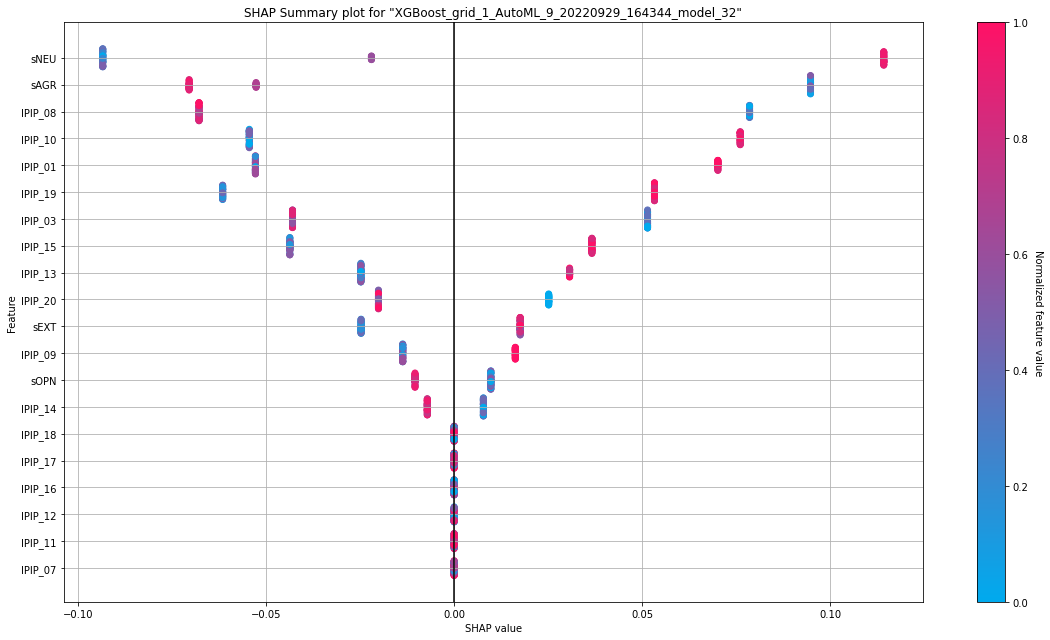

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

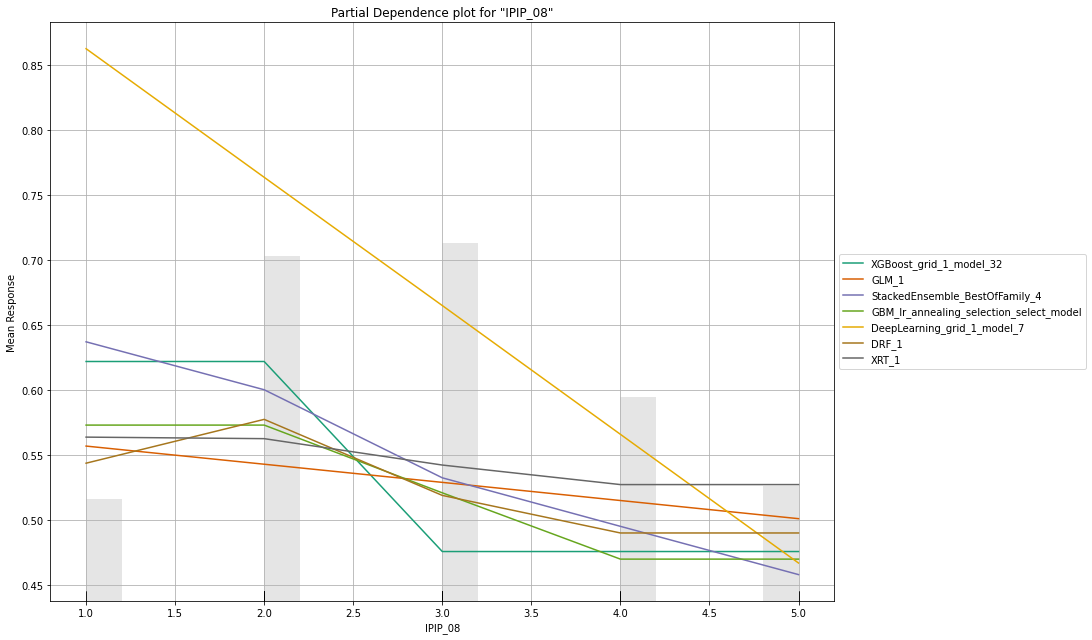

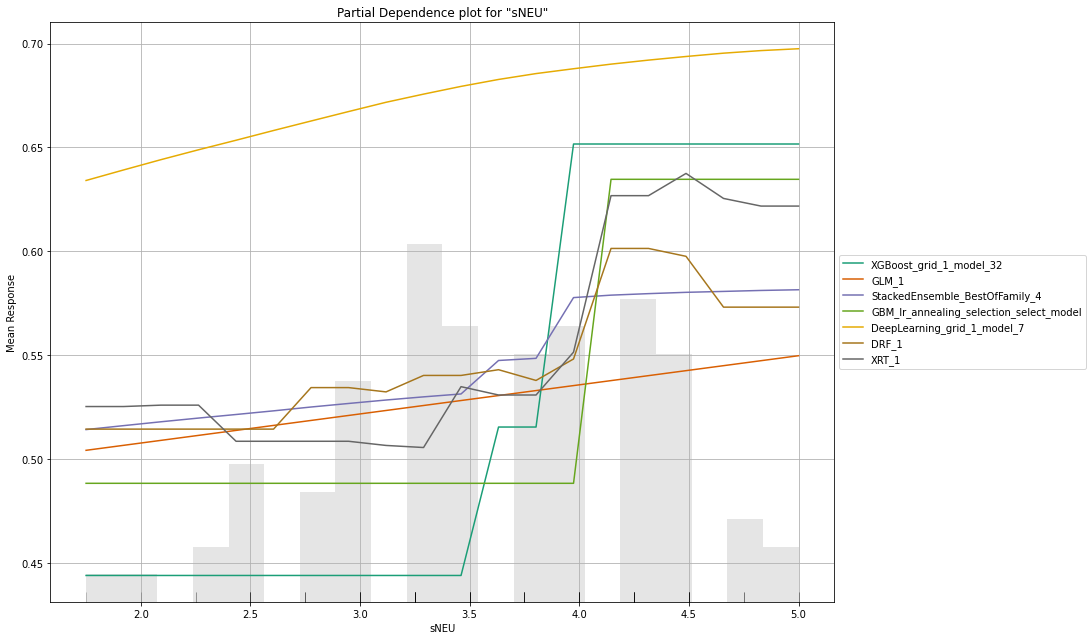

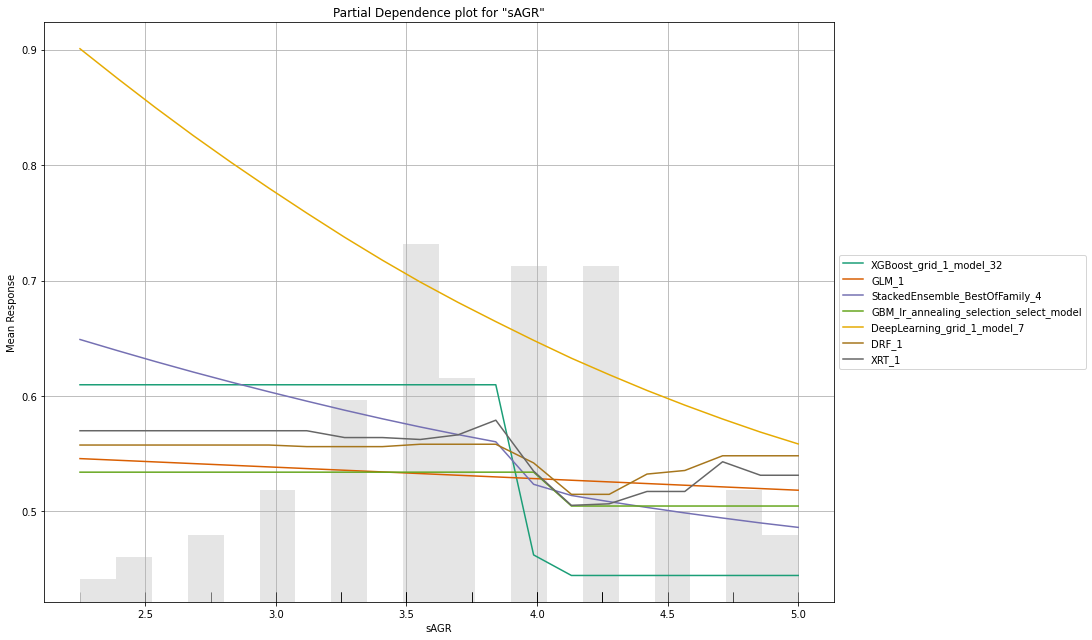

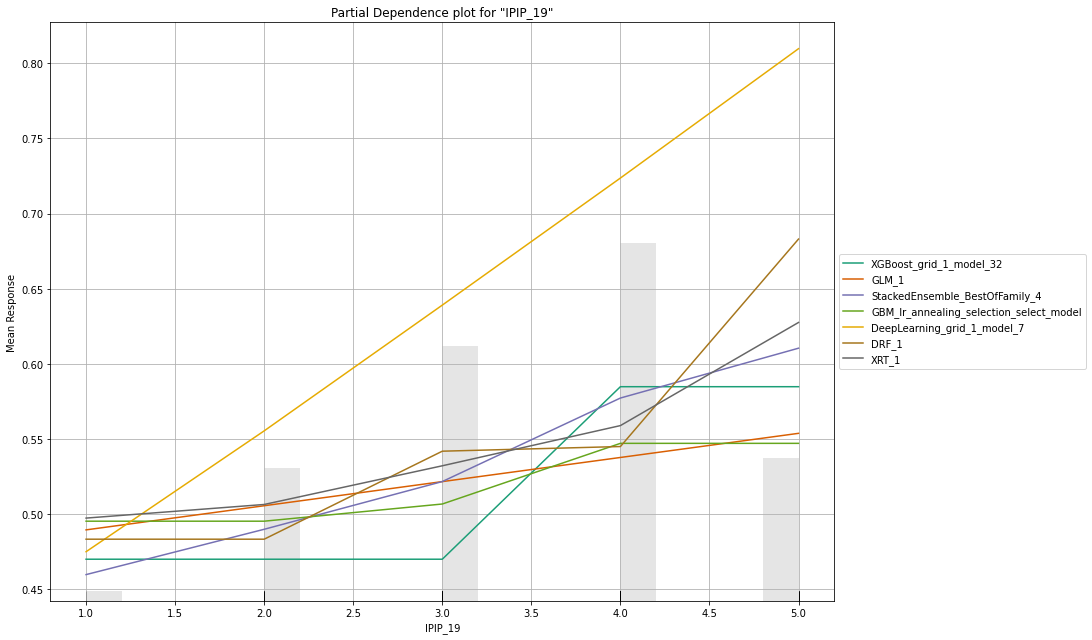

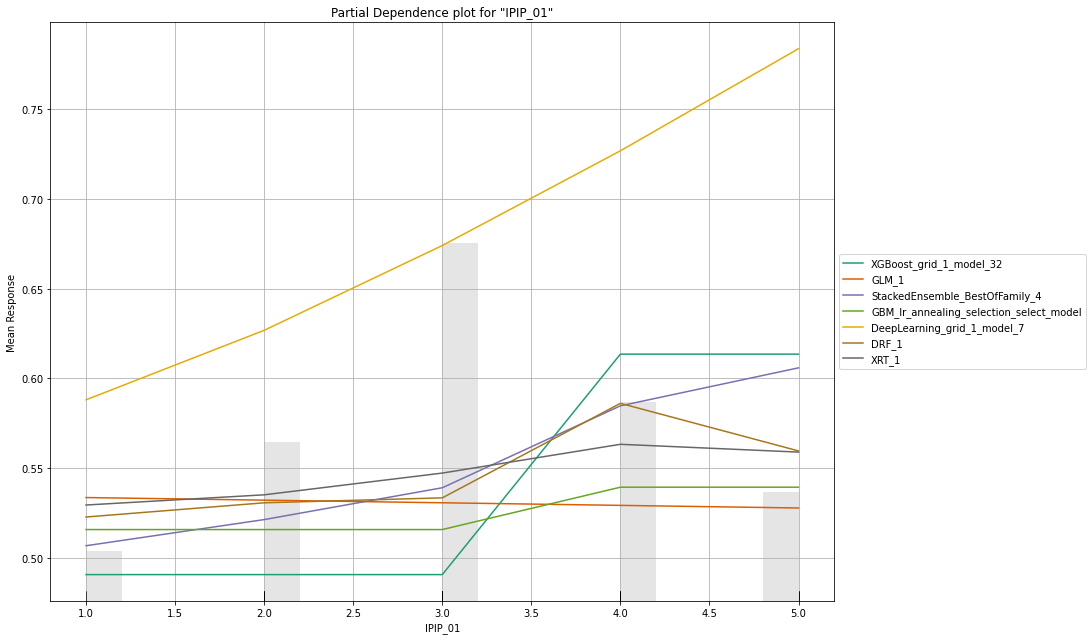

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

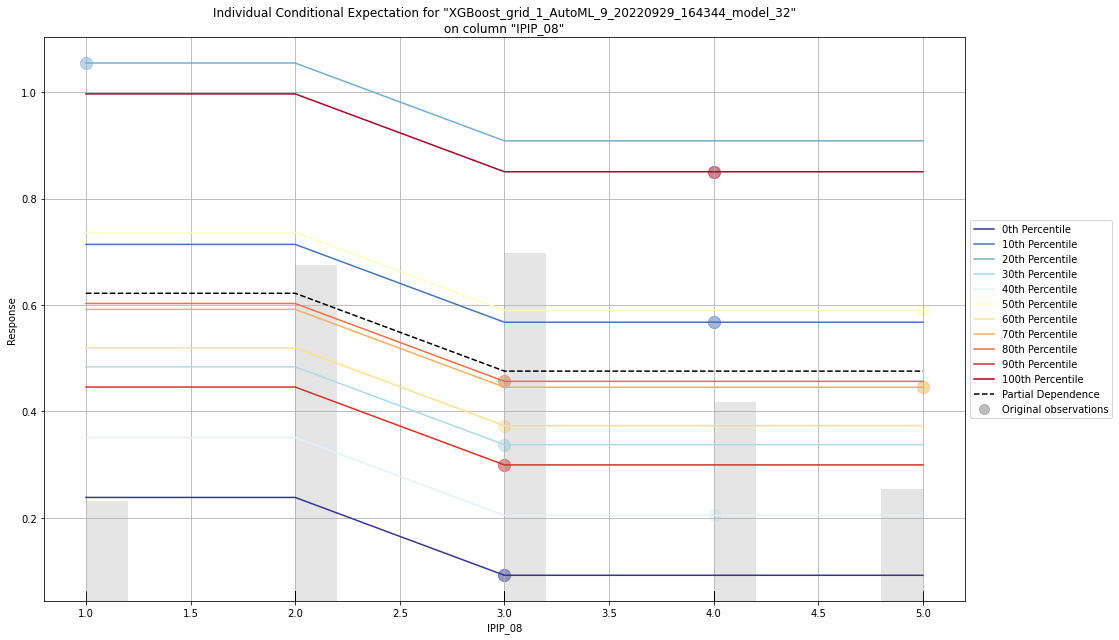

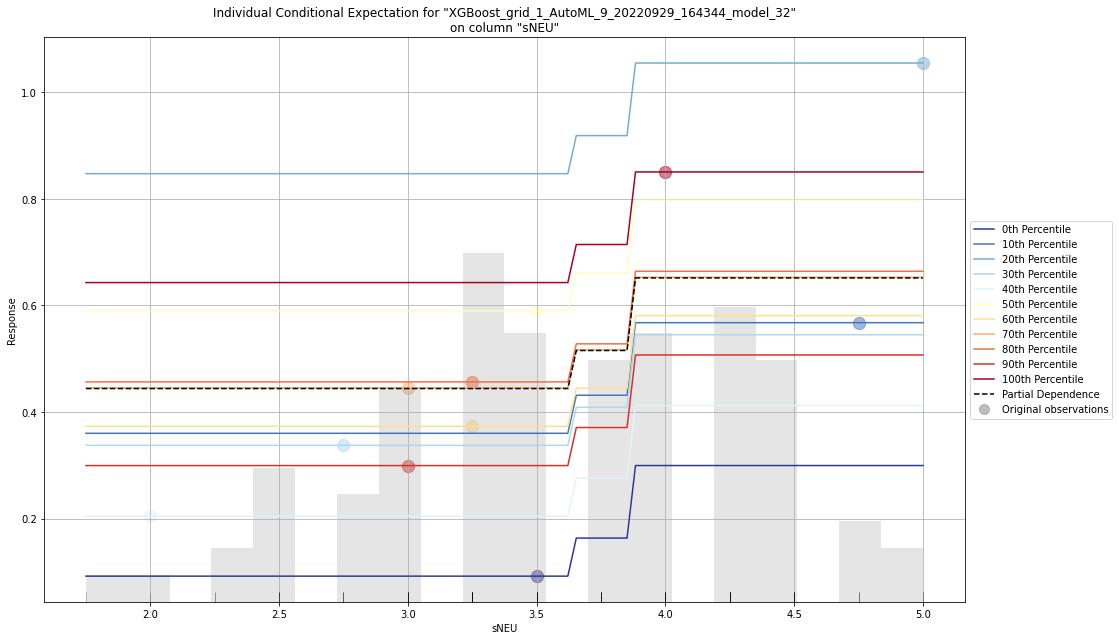

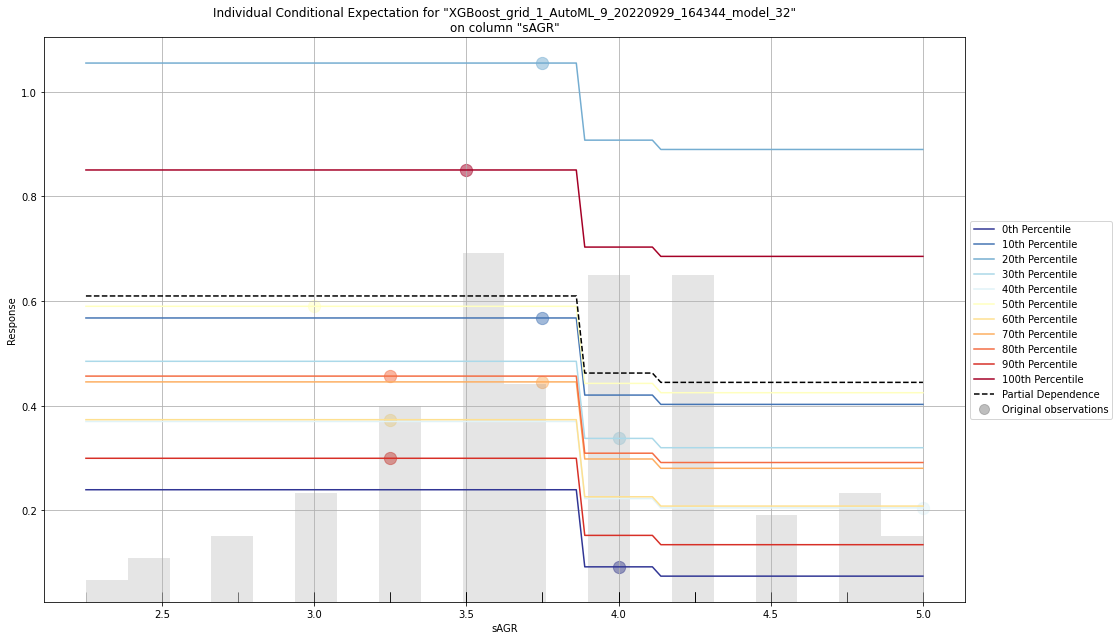

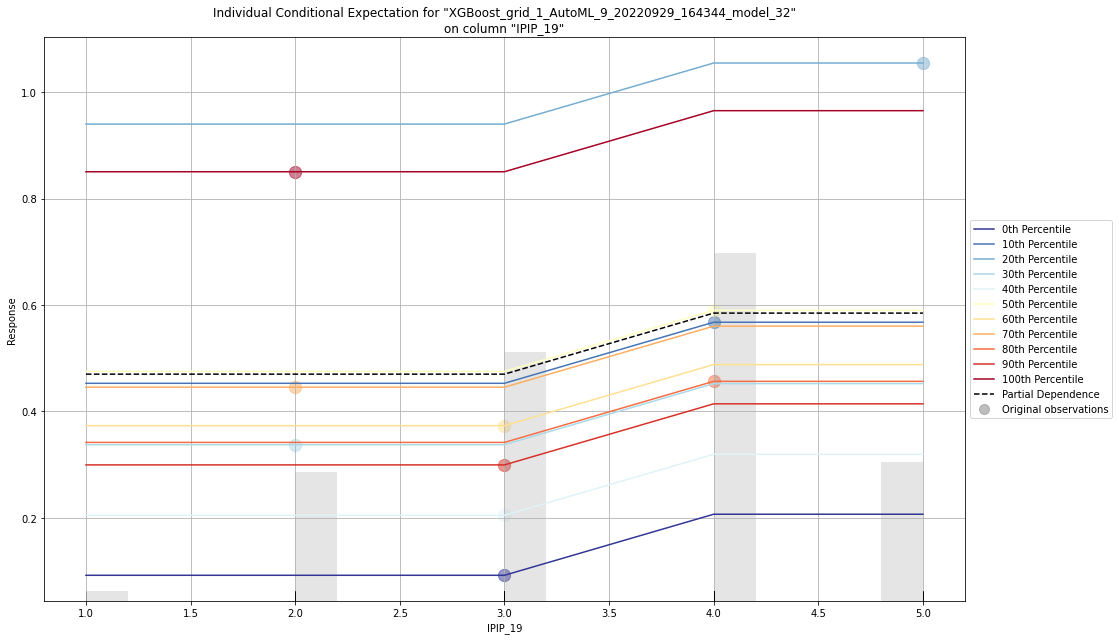

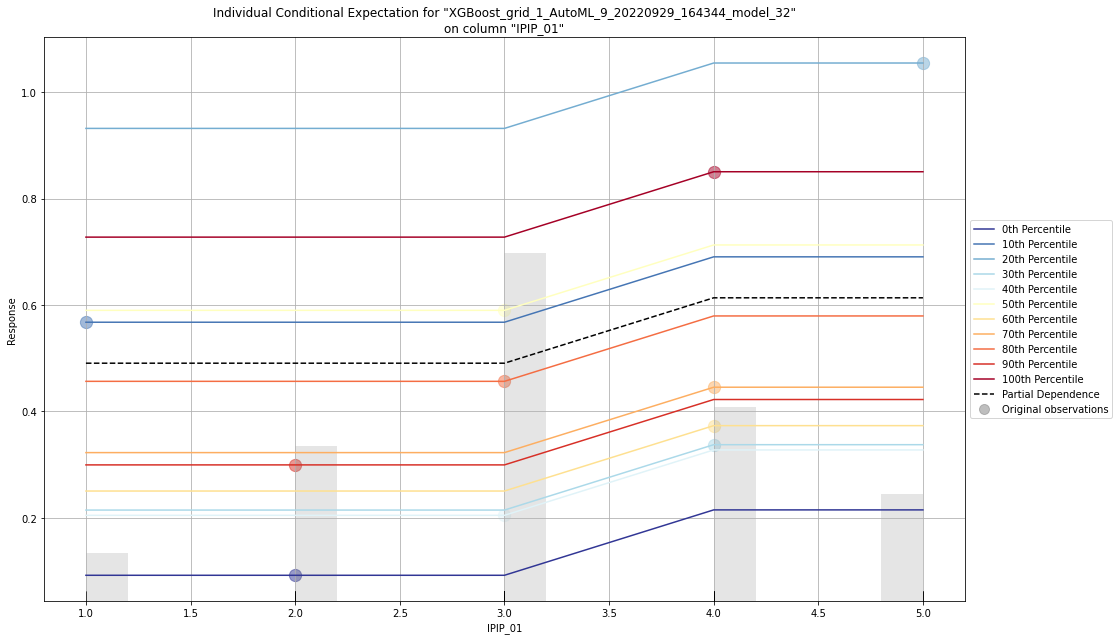

In [113]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(h2o_classes_test)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

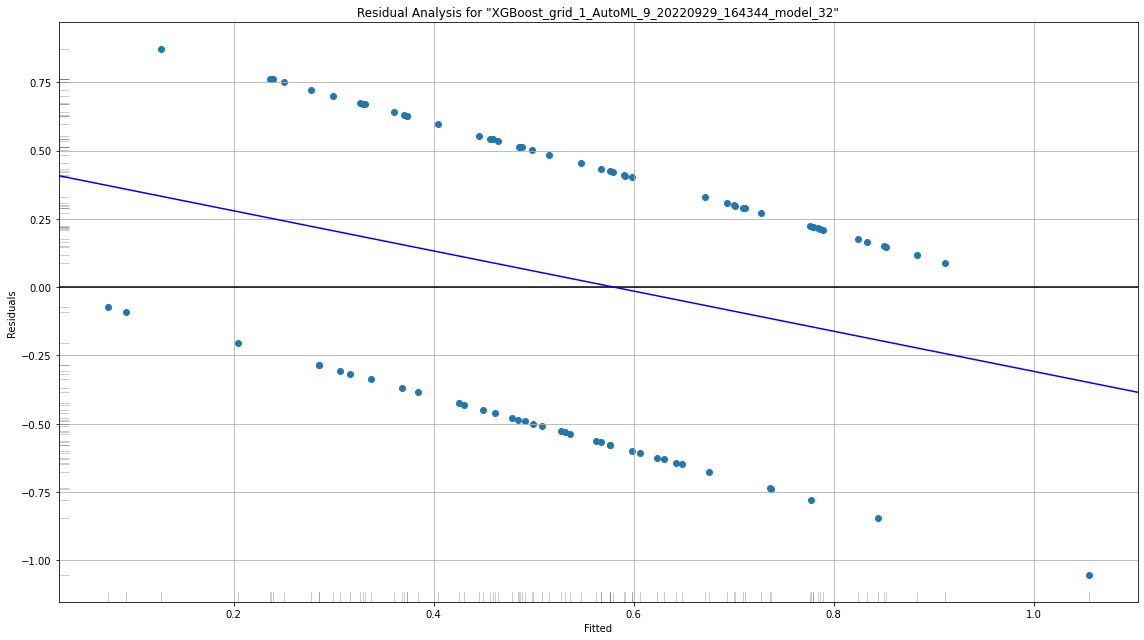

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

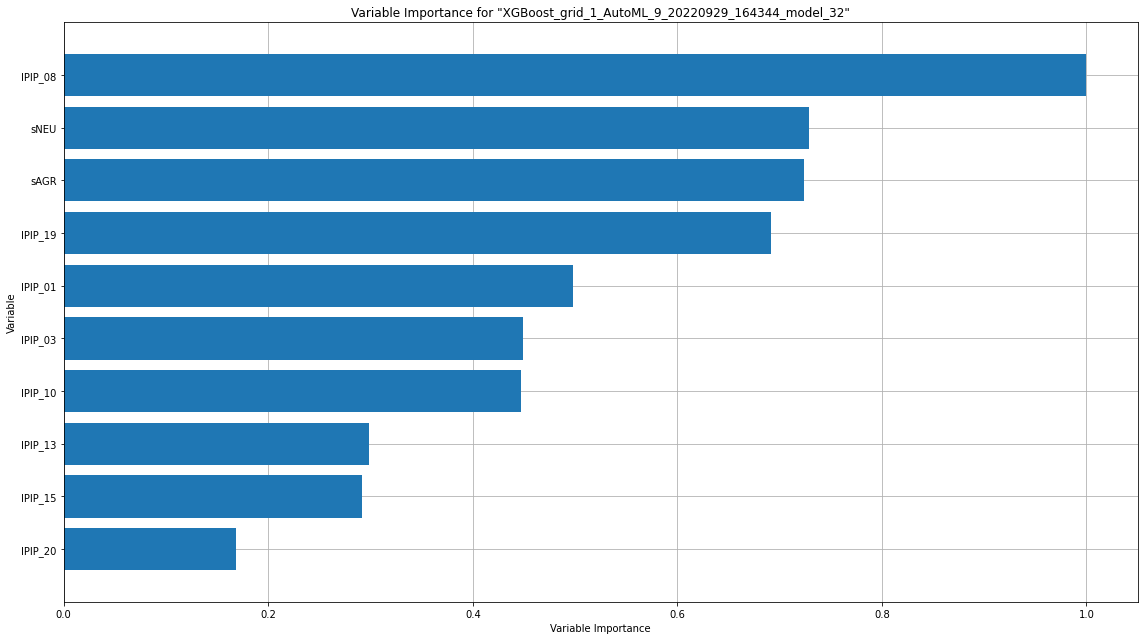

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

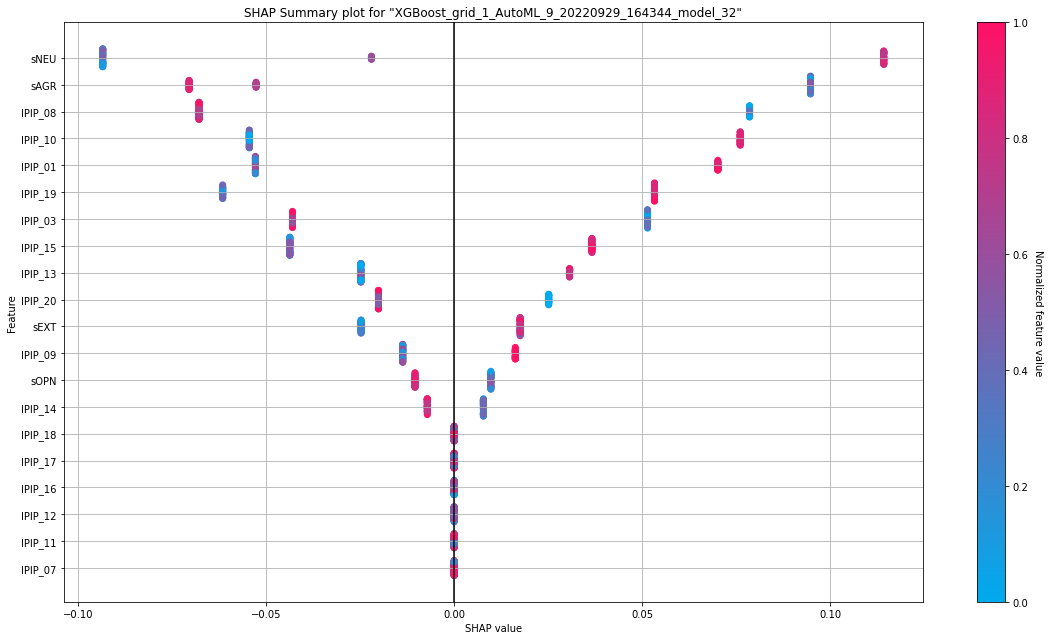

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

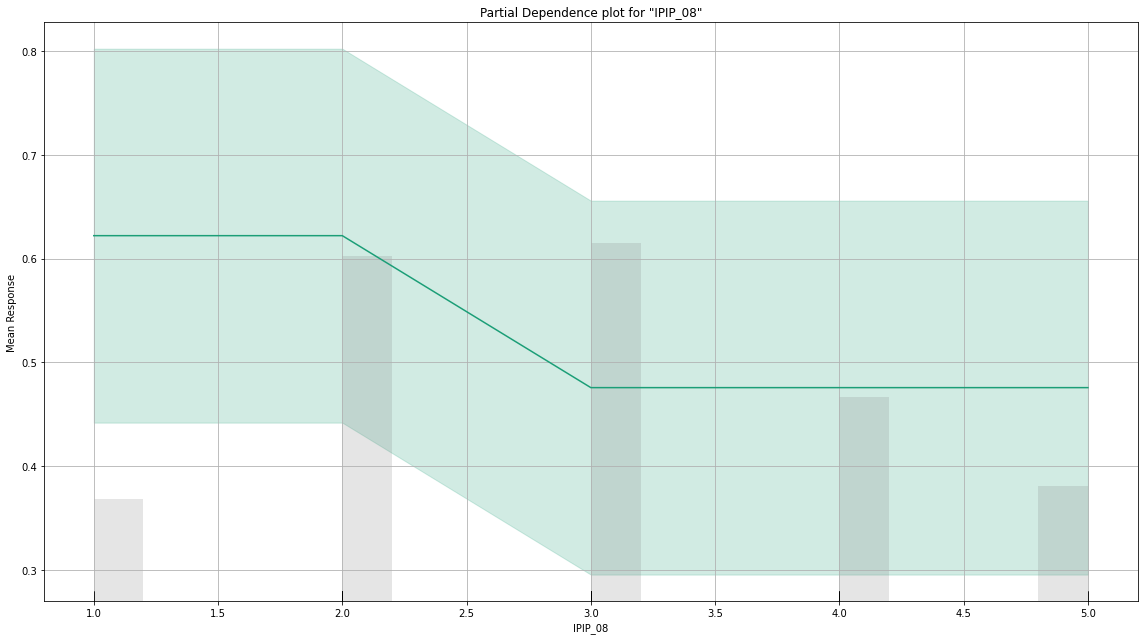

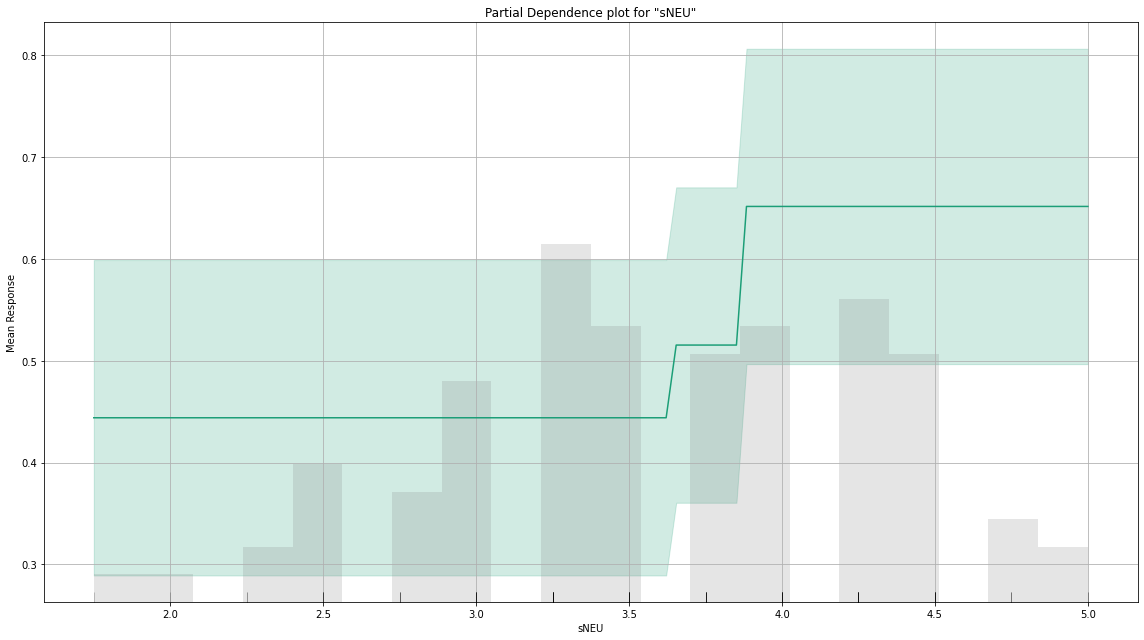

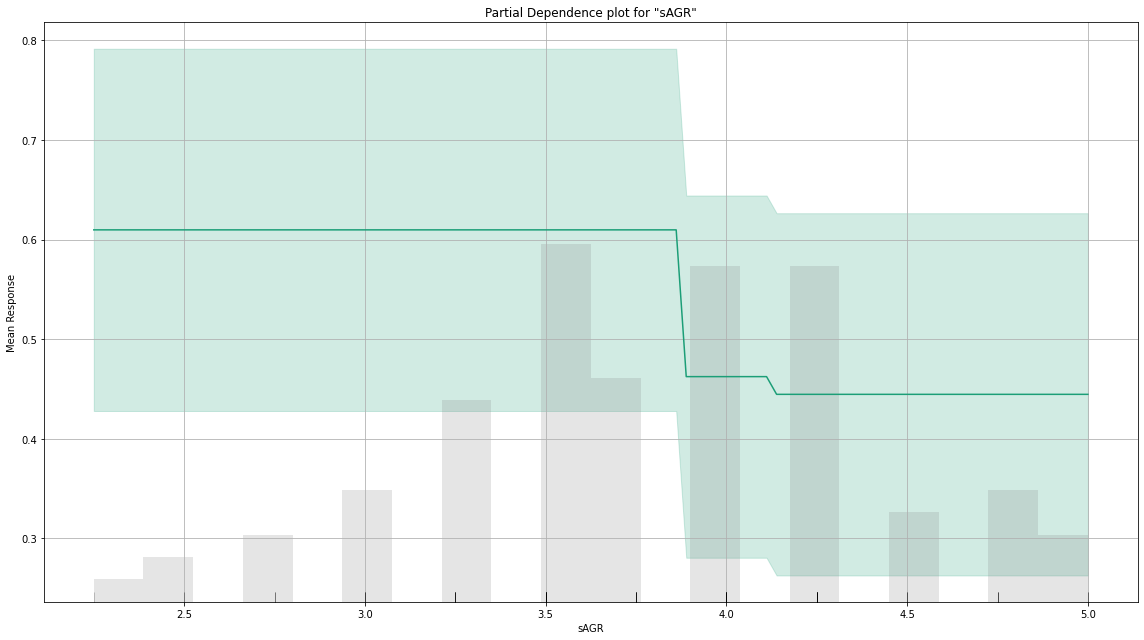

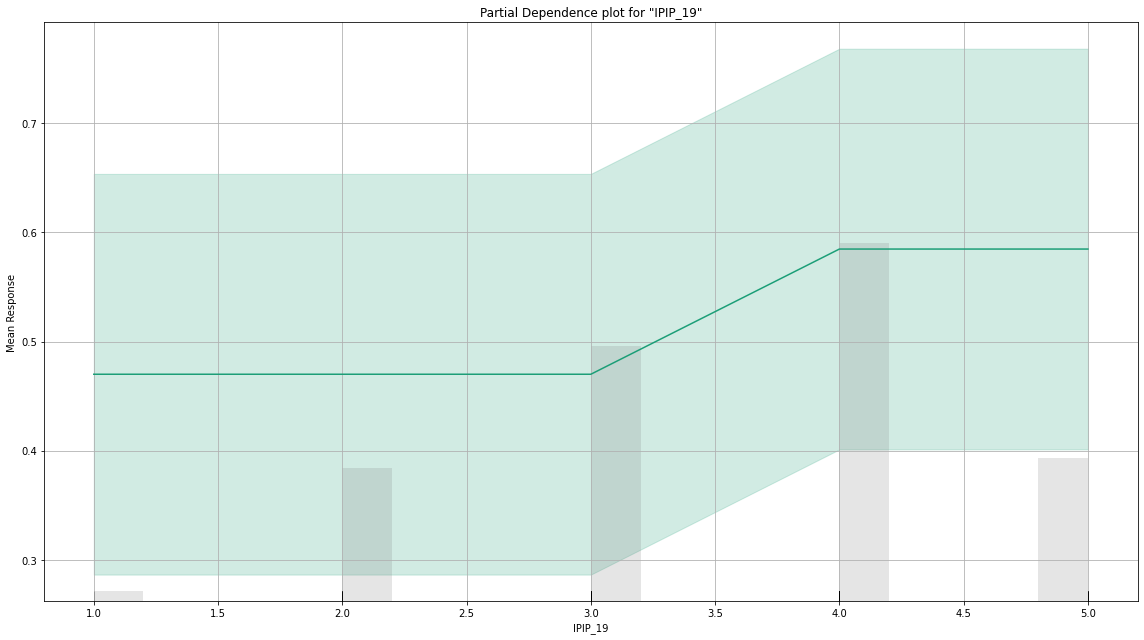

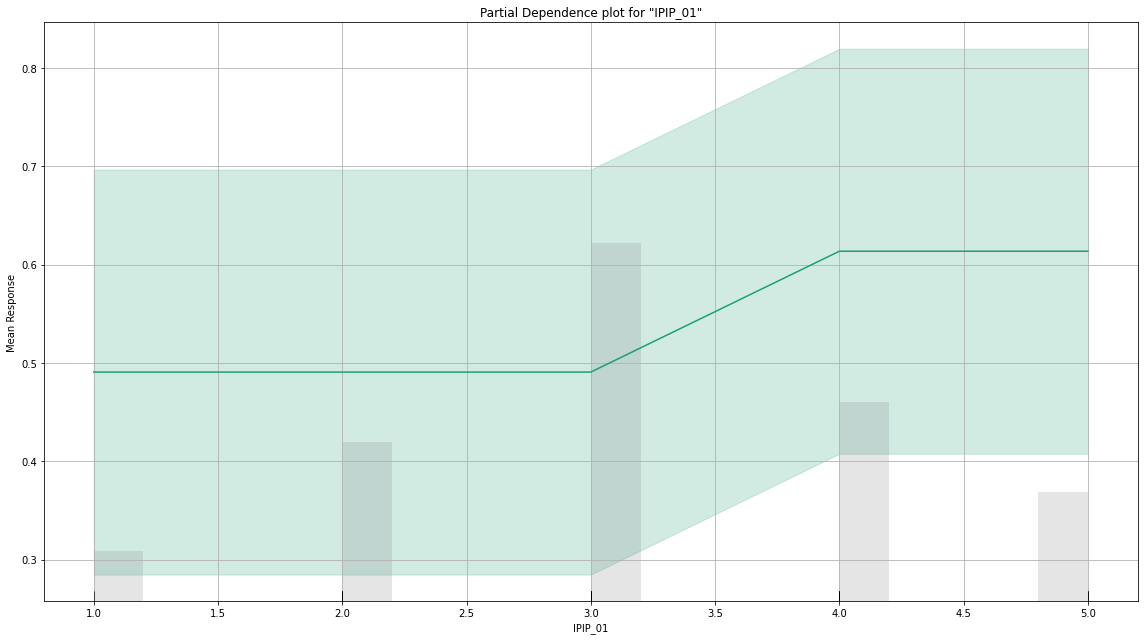

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

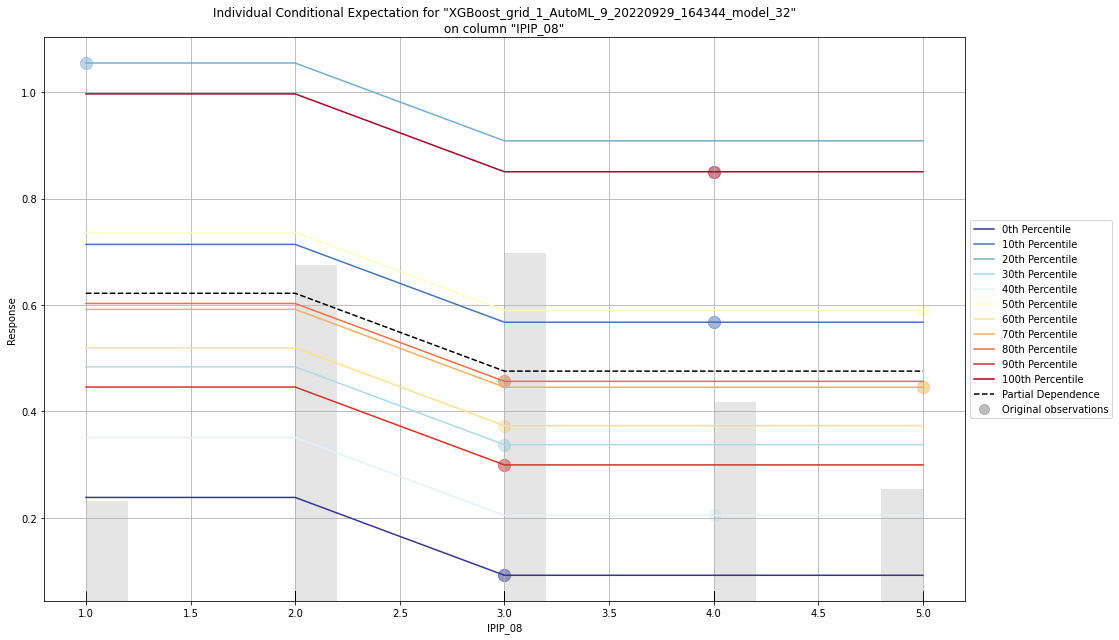

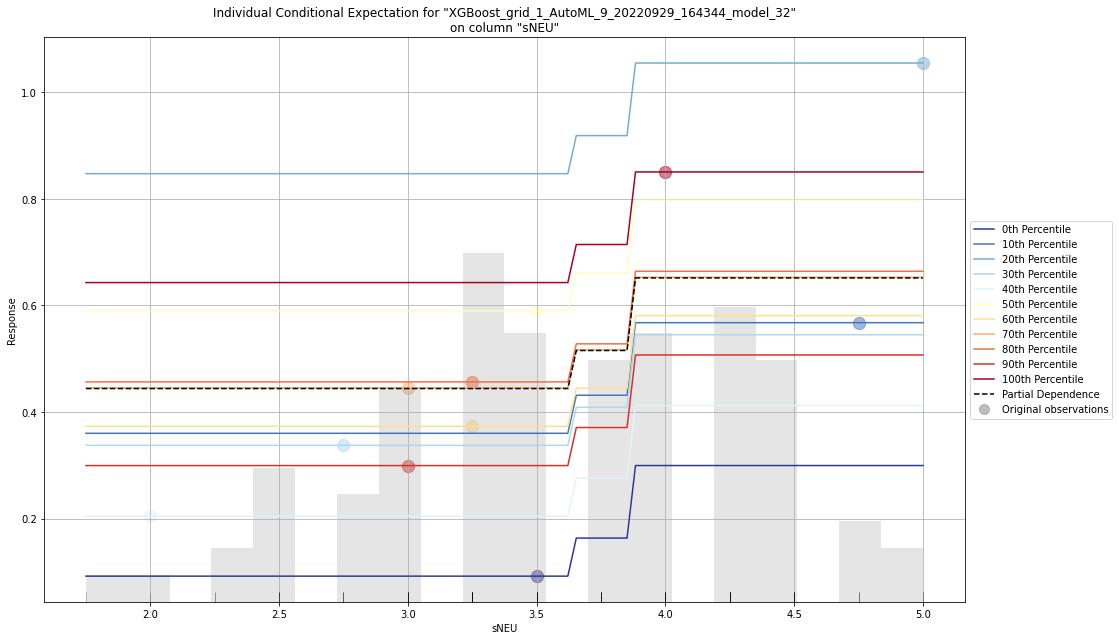

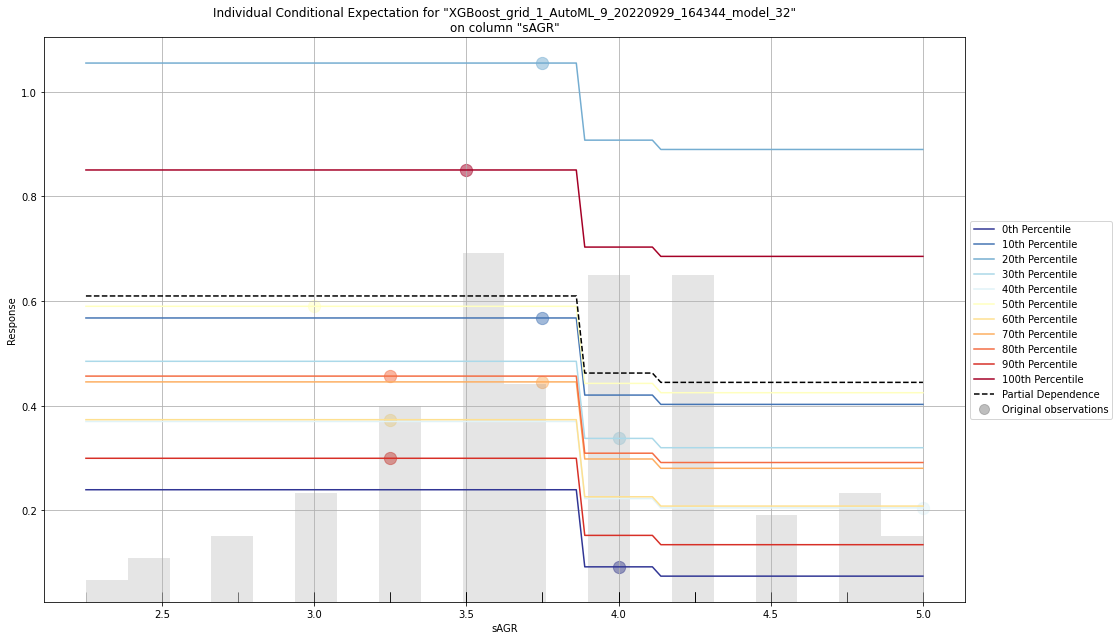

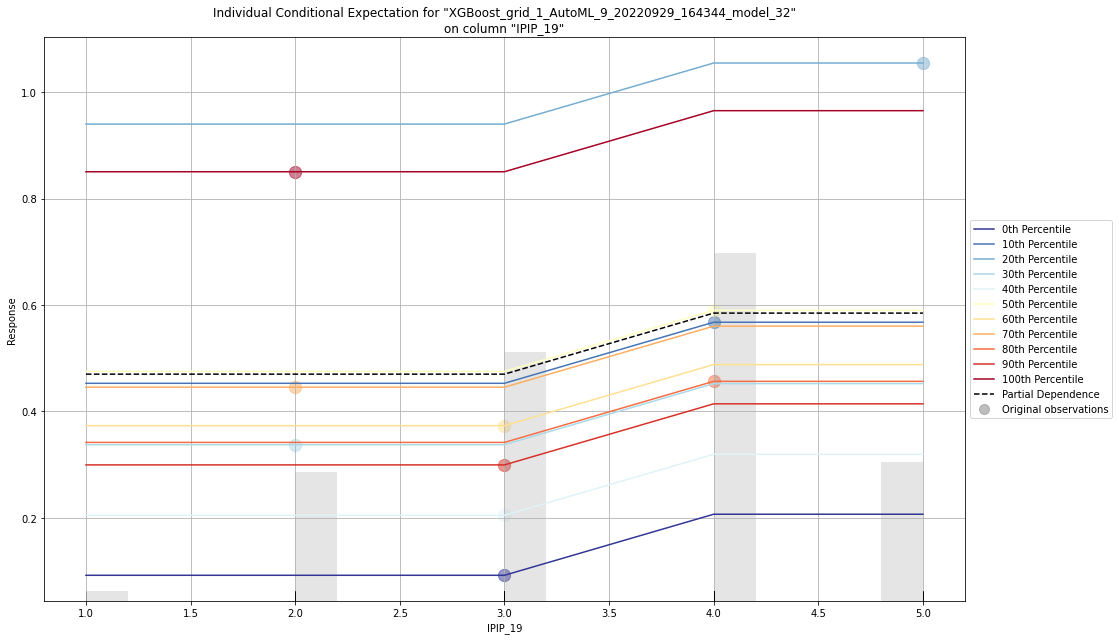

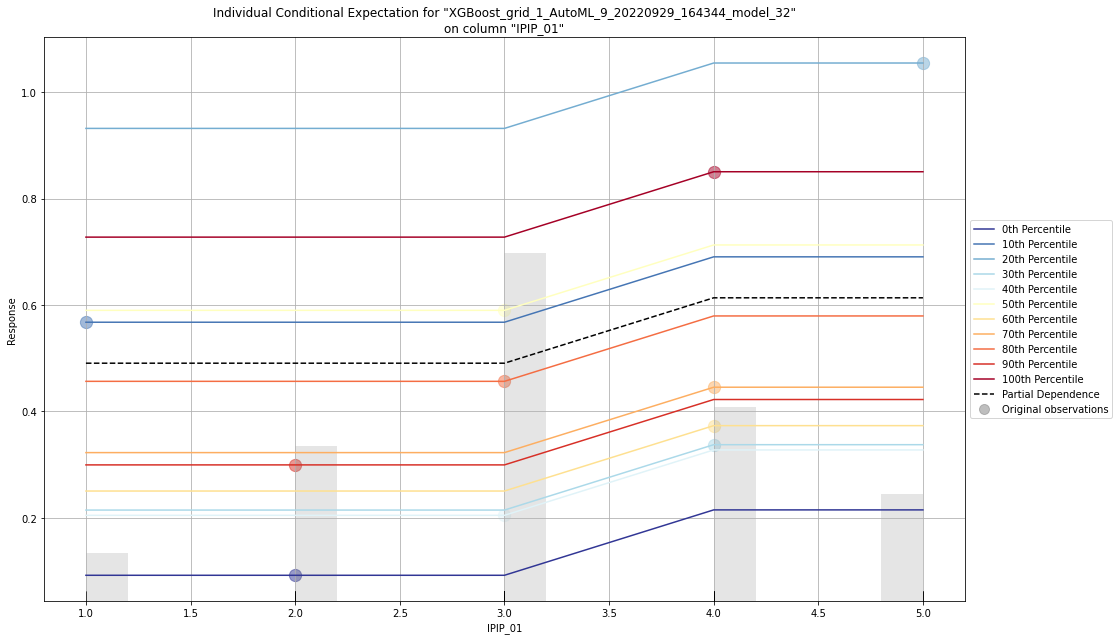

In [114]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(h2o_classes_test)